Think Stats - Chapter 4 Continuous Distributions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sct

The distributions we have used so far are called Empirical Distributions because they are based on empirical observations, which are necessarily finite samples. Continuous distributions are characterized by a CDF that is a continuous function(opposed to a step function). Many real-world phenomena can be approximated by continuous distributions.

Exponential Distribution: If the events are equally likely to occur at any time, the distribution of interarrival tends to look like an exponential distribution.

The Pareto Distribution: It is used to describe phenomena in the natural and social sciences including sizes of cities and towns, and other natural and social phenomena. There is a simple visual test that indicates whether an empirical distribution fits a Pareto distribution: on a log-log scale, the CCDF(CDF is used to find the probability of a variable taking a value less than or equal to x, CCDF is used to find the probability of a variable taking a value greater than x.) looks like a straight line.

Zipf's law is an observation about how often different words are used. The most common words have very high frequencies. Zipf's law predicts that in a body of text(corpus), the distribution of word frequencies is roughly Pareto.

Normal Distribution: also called Gaussian, the Normal Distribution is the most used because it describes so many phenomena(at least approximately).

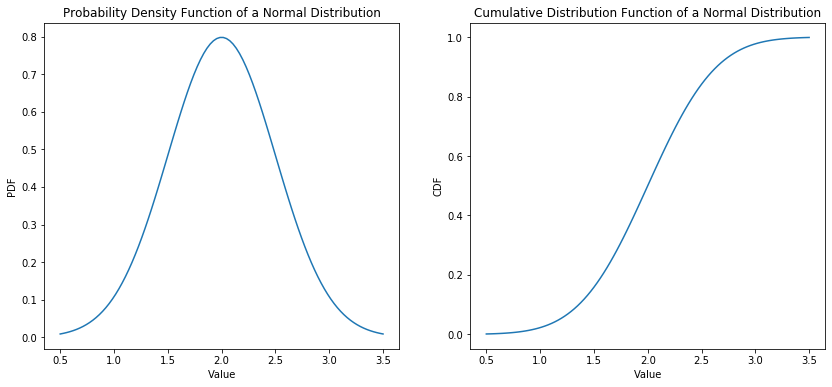

In [83]:
#Probability looks at probability at one point.
#Cumulative is the total probability of anything below it.

#The parameters mi and sigma determine the mean and standard deviation of the distribution.
mi = 2.0
sigma = 0.5
data_to_plot = np.linspace(mi - (3 * sigma), mi + (3 * sigma), 100)

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1)
plt.plot(data_to_plot, sct.norm.pdf(x, mi, sigma))
ax.set_xlabel('Value')
ax.set_ylabel('PDF')
ax.set_title('Probability Density Function of a Normal Distribution')

ax = fig.add_subplot(1, 2, 2)
plt.plot(x, sct.norm.cdf(x, mi, sigma))
ax.set_xlabel('Value')
ax.set_ylabel('CDF')
ax.set_title('Cumulative Distribution Function of a Normal Distribution')
plt.show()

In [31]:
data = pd.read_fwf("2002FemPreg.dat", names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb", "birthwgt_oz",
                                             "prglength", "outcome", "birthord", "agepreg", "finalwgt"],
                                     colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                              (276, 277), (278, 279), (283, 285), (422, 439)])
data.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,1,1.0,33.0,6448.271112,NaN
1,1,1.0,2.0,7.0,14.0,1,2.0,39.0,6448.271112,NaN
2,2,3.0,1.0,9.0,2.0,1,1.0,14.0,12999.542264,NaN
3,2,1.0,2.0,7.0,0.0,1,2.0,17.0,12999.542264,NaN
4,2,1.0,2.0,6.0,3.0,1,3.0,18.0,12999.542264,NaN


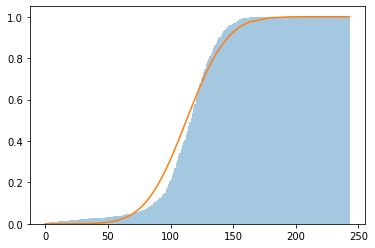

In [84]:
weights = data[data['outcome'] == 1][['birthwgt_lb', 'birthwgt_oz']].dropna()
weights = ((weights['birthwgt_lb']* 16) + weights['birthwgt_oz']).sort_values()

sns.distplot(weights, bins=int(weights.max() - weights.min()), kde=False, norm_hist=True, hist_kws={'cumulative': True})
plt.plot(weights.sort_values(), sct.norm.cdf(weights, weights.mean(), weights.std()))
plt.show()

In [109]:
#The Wechsler Adult Intelligence Scale is a test that is intended to measure intelligence. Results are transformed so that 
#the distribution of scores in the general population is normal with mi=100 and sigma=15.
#Investigate the frequency of rare events in a normal distribution.
mean = 100
std = 15

rvs = sct.norm.rvs(loc=mu, scale=sigma, size=1000, random_state=42)

#percentileofscore: Compute the percentile rank of a score relative to a list of scores.
#What fraction of the population has an IQ greater than the mean?
print(round(100 - sct.percentileofscore(rvs, mean), 2))
#What fraction is over 115?
print(round(100 - sct.percentileofscore(rvs, 115), 2))
#What fraction is over 130?
print(round(100 - sct.percentileofscore(rvs, 130), 2))
#What fraction is over 145?
print(round(100 - sct.percentileofscore(rvs, 145), 2))

#A "six-sigma" IQ = 190. In a world of 6 billion people, how many do we expect to have an IQ of 190 or more?
#ppf(): Percent point function (inverse of cdf) at q of the given RV.
print(6000000000 * sct.norm.ppf(190, loc=mean, scale=std))

51.0
15.5
2.4
0.2
nan


Normal Probability Plot: Unlike Exponential, Pareto and Weibull distributions, there is no simple transformation to check whether a continuouts distribution is a good model of a dataset. For the Normal Distribution there is an alternative called a normal probability plot(based on rankits). If you generate n values from a normal distribution and sort them, the k-th rankit is the mean of the distribution for the k-th value. Q–Q plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. The normal probability plot is a special case of the Q–Q plot for a normal distribution.

In [131]:
#Generate 6 samples from a normal distribution with mean=0 and std=1. Compute the mean of each one of the samples.
number_of_samples = 6
mean = 0
std = 1
number_of_values = 10000
samples = np.zeros((1, 6))

for val in range(number_of_values):
    #np.random.normal(): Draw random samples from a normal (Gaussian) distribution.
    samples += np.sort(np.random.normal(mean, std, number_of_samples))
    
samples = samples / number_of_values
print(samples)

[[-1.27090361 -0.64934291 -0.20604608  0.19134619  0.62992919  1.25662766]]


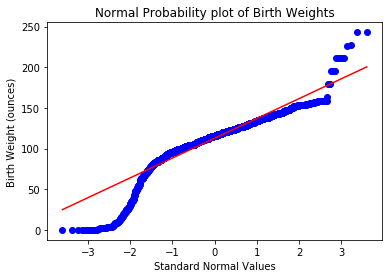

In [113]:
#We can use Normal Probability plots in order to make sure that a dataset confirms to a particular distribution.
#It works for any distribution as long as you know how to generate a normal sample.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sct.probplot(weights, plot=ax)
ax.set_xlabel('Standard Normal Values')
ax.set_ylabel('Birth Weight (ounces)')
ax.set_title('Normal Probability plot of Birth Weights')
plt.show()